In [2]:
import pandas as pd; pd.set_option('max_rows', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import yfinance as yf
import bt

In [1]:
!pip install bt

You should consider upgrading via the 'C:\AI\pythonProject\venv\Scripts\python.exe -m pip install --upgrade pip' command.


# read

In [3]:
start_date = '2003-07-29'
end_date   = '2021-09-29'

indice_tickers = ['^KS11', '^GSPC', '^IXIC',  '^N225',  '^HSI',     '^FCHI', '^GDAXI']
etf_tickers    = ['EWY',   'SPY',   'QQQ',    'EWJ',    'EWH',      'EWQ',   'EWG', 'AGG']

indice_names   = ['kospi', 'sp500', 'nasdaq', 'nikkei', 'hangseng', 'cac',   'dax']
etf_names      = ['kospi', 'sp500', 'nasdaq', 'nikkei', 'hangseng', 'cac',   'dax', 'agg']

risk_weight    = [.25, .425, .2, .375, .025, .0375, .025]
glide_weight   = [.72, .70, .68, .66, .638, .616, .594, .572, .55, .524, .498, .472, .446, .42, .402, .384, .366, .348, .31], 

indice = yf.download(indice_tickers, start=start_date, end=end_date)
etf    = yf.download(etf_tickers, start=start_date, end=end_date)

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  8 of 8 completed


In [4]:
indice

Adj Close                                           \
                  ^FCHI        ^GDAXI        ^GSPC          ^HSI   
Date                                                               
2003-07-28  3164.929932   3417.770020   996.520020  10134.879883   
2003-07-29  3142.389893   3428.120117   989.280029  10198.599609   
2003-07-30  3172.510010   3429.030029   987.489990  10121.219727   
2003-07-31  3210.270020   3487.860107   990.309998  10134.830078   
2003-08-01  3169.629883   3438.889893   980.150024  10248.599609   
...                 ...           ...          ...           ...   
2021-09-22  6637.000000  15506.740234  4395.640137           NaN   
2021-09-23  6701.979980  15643.969727  4448.979980  24510.980469   
2021-09-24  6638.459961  15531.750000  4455.479980  24192.160156   
2021-09-27  6650.910156  15573.879883  4443.109863  24208.779297   
2021-09-28  6506.500000  15248.559570  4352.629883  24500.390625   

                                                           Close  \
                   ^IXIC        ^KS11         ^N225        ^FCHI   
Date                                                               
2003-07-28   1735.359985          NaN           NaN  3164.929932   
2003-07-29   1731.369995   722.330017   9834.309570  3142.389893   
2003-07-30   1720.910034   714.150024   9632.660156  3172.510010   
2003-07-31   1735.020020   713.520020   9563.209961  3210.270020   
2003-08-01   1715.619995   727.260010   9611.669922  3169.629883   
...                  ...          ...           ...          ...   
2021-09-22  14896.849609          NaN  29639.400391  6637.000000   
2021-09-23  15052.240234  3127.580078           NaN  6701.979980   
2021-09-24  15047.700195  3125.239990  30248.810547  6638.459961   
2021-09-27  14969.969727  3133.639893  30240.060547  6650.910156   
2021-09-28  14546.679688  3097.919922  30183.960938  6506.500000   

                                       ...          Open               \
                  ^GDAXI        ^GSPC  ...         ^IXIC        ^KS11   
Date                                   ...                              
2003-07-28   3417.770020   996.520020  ...   1734.680054          NaN   
2003-07-29   3428.120117   989.280029  ...   1740.270020   718.419983   
2003-07-30   3429.030029   987.489990  ...   1731.569946   721.659973   
2003-07-31   3487.860107   990.309998  ...   1735.469971   716.500000   
2003-08-01   3438.889893   980.150024  ...   1731.630005   718.840027   
...                  ...          ...  ...           ...          ...   
2021-09-22  15506.740234  4395.640137  ...  14800.589844          NaN   
2021-09-23  15643.969727  4448.979980  ...  14960.000000  3123.639893   
2021-09-24  15531.750000  4455.479980  ...  14961.610352  3140.729980   
2021-09-27  15573.879883  4443.109863  ...  14954.179688  3121.699951   
2021-09-28  15248.559570  4352.629883  ...  14787.209961  3133.399902   

                               Volume                             \
                   ^N225        ^FCHI       ^GDAXI         ^GSPC   
Date                                                               
2003-07-28           NaN          0.0   70777700.0  1.328600e+09   
2003-07-29   9895.709961          0.0   87003800.0  1.508900e+09   
2003-07-30   9811.599609          0.0   84533400.0  1.391900e+09   
2003-07-31   9616.330078          0.0  127620300.0  1.608000e+09   
2003-08-01   9646.660156          0.0   94124400.0  1.390600e+09   
...                  ...          ...          ...           ...   
2021-09-22  29744.730469   91076800.0   54135200.0  3.273670e+09   
2021-09-23           NaN   82926000.0   54651300.0  2.833290e+09   
2021-09-24  30141.609375   70090500.0   49967000.0  2.772090e+09   
2021-09-27  30277.820312   89455000.0   59034800.0  3.032870e+09   
2021-09-28  30142.380859  117799600.0   75174800.0  3.495970e+09   

                                                              
                    ^HSI         ^IXIC     ^KS11       ^N225  
Date  

In [3]:
indice['Adj Close']

,^FCHI,^GDAXI,^GSPC,^HSI,^IXIC,^KS11,^N225
Date,,,,,,,
2003-07-28,3164.929932,3417.770020,996.520020,10134.879883,1735.359985,NaN,NaN
2003-07-29,3142.389893,3428.120117,989.280029,10198.599609,1731.369995,722.330017,9834.309570
2003-07-30,3172.510010,3429.030029,987.489990,10121.219727,1720.910034,714.150024,9632.660156
2003-07-31,3210.270020,3487.860107,990.309998,10134.830078,1735.020020,713.520020,9563.209961
2003-08-01,3169.629883,3438.889893,980.150024,10248.599609,1715.619995,727.260010,9611.669922
...,...,...,...,...,...,...,...
2021-09-22,6637.000000,15506.740234,4395.640137,NaN,14896.849609,NaN,29639.400391
2021-09-23,6701.979980,15643.969727,4448.979980,24510.980469,15052.240234,3127.580078,NaN
2021-09-24,6638.459961,15531.750000,4455.479980,24192.160156,15047.700195,3125.239990,30248.810547


In [4]:
etf

Adj Close                                                         \
                   AGG        EWG        EWH        EWJ        EWQ        EWY   
Date                                                                            
2003-07-28         NaN   8.589717   4.700956  24.707081  10.765285  17.662939   
2003-07-29         NaN   8.562789   4.724343  24.390318  10.625310  17.903797   
2003-07-30         NaN   8.475277   4.712651  23.883509  10.695293  17.767305   
2003-07-31         NaN   8.549325   4.765273  24.073557  10.708022  17.422079   
2003-08-01         NaN   8.414691   4.741884  23.788483  10.517147  17.767305   
...                ...        ...        ...        ...        ...        ...   
2021-09-22  115.815758  33.860001  24.340000  72.489998  38.189999  81.989998   
2021-09-23  115.247543  34.320000  24.219999  72.910004  38.860001  83.959999   
2021-09-24  115.048172  33.970001  23.590000  72.660004  38.410000  82.510002   
2021-09-27  114.888672  34.020000  23.760000  72.599998  38.500000  83.000000   
2021-09-28  114.410172  33.310001  23.520000  71.029999  37.639999  81.000000   

                                         Close             ...        Open  \
                   QQQ         SPY         AGG        EWG  ...         QQQ   
Date                                                       ...               
2003-07-28   27.658085   69.914528         NaN  12.760000  ...   31.860001   
2003-07-29   27.449932   69.592506         NaN  12.720000  ...   31.930000   
2003-07-30   27.250454   69.424454         NaN  12.590000  ...   31.709999   
2003-07-31   27.580030   69.585487         NaN  12.700000  ...   31.790001   
2003-08-01   27.285147   68.969398         NaN  12.500000  ...   31.690001   
...                ...         ...         ...        ...  ...         ...   
2021-09-22  369.570007  437.859985  116.180000  33.860001  ...  367.089996   
2021-09-23  372.980011  443.179993  115.610001  34.320000  ...  370.760010   
2021-09-24  373.329987  443.910004  115.410004  33.970001  ...  370.649994   
2021-09-27  370.350006  442.640015  115.250000  34.020000  ...  370.200012   
2021-09-28  359.869995  433.720001  114.769997  33.310001  ...  365.670013   

                           Volume                                       \
                   SPY        AGG      EWG      EWH       EWJ      EWQ   
Date                                                                     
2003-07-28  100.370003        NaN    93700   169900    647950     3700   
2003-07-29  100.139999        NaN    99200   141300    481925     1700   
2003-07-30   99.599998        NaN    40500   105000    474175   157000   
2003-07-31   99.980003        NaN     5100   258500   1049425     5700   
2003-08-01   99.190002        NaN   546900   137400    532975     8300   
...                ...        ...      ...      ...       ...      ...   
2021-09-22  436.049988  7139900.0  4088700  8596600   7810400  1100700   
2021-09-23  439.850006  8265000.0  3632200  4558700   5483600  1139700   
2021-09-24  441.440002  4461900.0  2829200  5859300   4931900  1049200   
2021-09-27  442.809998  5630600.0  2332200  4466700   6289300   623200   
2021-09-28  439.690002  7017100.0  5896200  4345900  14174600   837000   

                                          
                EWY       QQQ        SPY  
Date                                      
2003-07-28   185000  56180800   34382800  
2003-07-29    60000  80560100   53472100  
2003-07-30    62400  56617300   28363300  
2003-07-31    90500  85544100   54937200  
2003-08-01   385600  73545400   49321000  
...             ...       ...        ...  
2021-09-22  3505300  46972900  102350100  
2021-09-23  3374800  44652000   76396000  
2021-09-24  2704900  36056800   62094800  
2021-09-27  2711200  43338100   61371100  
2021-09-28  4310000  97701600  130436300  

[4576 rows x 48 columns]

In [5]:
etf['Adj Close']

,AGG,EWG,EWH,EWJ,EWQ,EWY,QQQ,SPY
Date,,,,,,,,
2003-07-28,NaN,8.589717,4.700956,24.707081,10.765285,17.662939,27.658085,69.914528
2003-07-29,NaN,8.562789,4.724343,24.390318,10.625310,17.903797,27.449932,69.592506
2003-07-30,NaN,8.475277,4.712651,23.883509,10.695293,17.767305,27.250454,69.424454
2003-07-31,NaN,8.549325,4.765273,24.073557,10.708022,17.422079,27.580030,69.585487
2003-08-01,NaN,8.414691,4.741884,23.788483,10.517147,17.767305,27.285147,68.969398
...,...,...,...,...,...,...,...,...
2021-09-22,115.815758,33.860001,24.340000,72.489998,38.189999,81.989998,369.570007,437.859985
2021-09-23,115.247543,34.320000,24.219999,72.910004,38.860001,83.959999,372.980011,443.179993
2021-09-24,115.048172,33.970001,23.590000,72.660004,38.410000,82.510002,373.329987,443.910004


# indice & etf corr

In [6]:
pd.concat([indice['Adj Close'], etf['Adj Close']], axis=1).corr().iloc[:7, -7:]

,EWG,EWH,EWJ,EWQ,EWY,QQQ,SPY
^FCHI,0.756617,0.647044,0.888781,0.880343,0.657951,0.644941,0.701003
^GDAXI,0.951660,0.973145,0.900323,0.906903,0.887160,0.885311,0.938480
^GSPC,0.865952,0.920883,0.931032,0.896461,0.836425,0.981121,0.998247
^HSI,0.918573,0.907584,0.759410,0.858014,0.892602,0.668527,0.731338
^IXIC,0.819560,0.887665,0.898105,0.856513,0.820044,0.998858,0.991390
^KS11,0.920509,0.913245,0.777692,0.845373,0.977151,0.791617,0.817217
^N225,0.838509,0.829640,0.975932,0.903471,0.755079,0.872063,0.910902


# glide path

In [5]:
glide_path = pd.DataFrame(
    {
        'year': list(range(2003, 2022)), 
        'RA': [.72, .70, .68, .66, .638, .616, .594, .572, .55, .524, .498, .472, .446, .42, .402, .384, .366, .348, .31], 
    }
)
glide_path['year'] = glide_path['year'].astype('str')
glide_path['AGG']  = 1 - glide_path['RA']
glide_path['EWG']  = glide_path['RA'] * .025
glide_path['EWH']  = glide_path['RA'] * .025
glide_path['EWJ']  = glide_path['RA'] * .0375
glide_path['EWQ']  = glide_path['RA'] * .0375
glide_path['EWY']  = glide_path['RA'] * .25
glide_path['QQQ']  = glide_path['RA'] * .2
glide_path['SPY']  = glide_path['RA'] * .425
glide_path['Date'] = glide_path['year'] + '-09-29'
glide_path['Date'] = glide_path.apply(lambda x: etf['Adj Close'].index[etf['Adj Close'].index.get_loc(x['Date'], method='nearest')], axis=1)
# 위에 줄 왓더?
glide_path.set_index('Date', inplace=True)
glide_path.drop(['RA', 'year'], axis=1, inplace=True)

glide_path

,AGG,EWG,EWH,EWJ,EWQ,EWY,QQQ,SPY
Date,,,,,,,,
2003-09-29,0.280,0.01800,0.01800,0.027000,0.027000,0.1800,0.1440,0.30600
2004-09-29,0.300,0.01750,0.01750,0.026250,0.026250,0.1750,0.1400,0.29750
2005-09-29,0.320,0.01700,0.01700,0.025500,0.025500,0.1700,0.1360,0.28900
2006-09-29,0.340,0.01650,0.01650,0.024750,0.024750,0.1650,0.1320,0.28050
2007-09-28,0.362,0.01595,0.01595,0.023925,0.023925,0.1595,0.1276,0.27115
2008-09-29,0.384,0.01540,0.01540,0.023100,0.023100,0.1540,0.1232,0.26180
2009-09-29,0.406,0.01485,0.01485,0.022275,0.022275,0.1485,0.1188,0.25245
2010-09-29,0.428,0.01430,0.01430,0.021450,0.021450,0.1430,0.1144,0.24310
2011-09-29,0.450,0.01375,0.01375,0.020625,0.020625,0.1375,0.1100,0.23375


# backtest

In [6]:
strategy = bt.Strategy(
    'benchmark_portfolio', 
    algos=[
        bt.algos.
        bt.algos.SelectAll(), 
        bt.algos.WeighTarget(glide_path), 
        bt.algos.Rebalance(), 
    ]
)
backtest = bt.Backtest(strategy=strategy, data=etf['Adj Close'].loc['2003-07-29':])
result   = bt.run(backtest)

In [7]:
benchmark_portfolio = result.prices

In [8]:
benchmark_portfolio

,benchmark_portfolio
2003-07-28,100.000000
2003-07-29,100.000000
2003-07-30,100.000000
2003-07-31,100.000000
2003-08-01,100.000000
...,...
2021-09-22,382.891055
2021-09-23,384.009749
2021-09-24,382.868449
2021-09-27,382.368980


# 예측값의 통계적 이상치 활용 시나리오

In [14]:
def makeThreshold(a, b, c, d, e, f):
    # if (a > b + d * c) & (a < b + e * c):
    if (a > 0.225) & (a < 0.375):
        result = 1
    else:
        result = 0
    return result

def getInOut(a, b):
    if   (a == 1) & (b == 0):
        result = 'out'
    elif (a == 0) & (b == 1):
        result = 'in'
    else:
        result = ''
    return result

def getRebalancedGlidePath(portfolio, glide_path, out_std_multiple, in_std_multiple):
    
    df = portfolio.copy()
    gp = glide_path.copy()
    gp['class'] = 'gp'
    
    df['Change']  = df[df.columns[0]].pct_change()
    df['Change'].fillna(method='bfill', inplace=True)
    df['HV']      = df['Change'].rolling(window=20, min_periods=0, center=False).std() * np.sqrt(252)
    df['HV_diff'] = df['HV'].diff()
    df['Scaled']  = df['benchmark_portfolio'] / 500
    
    HV_mean  = df['HV'].mean()
    HV_std   = df['HV'].std(ddof=0)
    
    df['Rebalance'] = df.apply(lambda x: makeThreshold(x['HV'], HV_mean, HV_std, out_std_multiple, in_std_multiple, x['HV_diff']), axis=1)
    df['Rebalance_shift'] = df['Rebalance'].shift(1)
    df['Position']  = df.apply(lambda x: getInOut(x['Rebalance'], x['Rebalance_shift']), axis=1)
    
    out_idx = df[df['Position'] == 'out'].index.tolist()
    in_idx  = df[df['Position'] == 'in'].index.tolist()
    
    out_df  = pd.DataFrame(index=out_idx, columns=gp.columns)
    in_df   = pd.DataFrame(index=in_idx, columns=gp.columns)
    out_df['class'] = 'out'
    in_df['class']  = 'in'
    
    rebalanced_glide_path = pd.concat([gp, out_df, in_df], axis=0).sort_index()
    
    return df, rebalanced_glide_path

In [15]:
df, rebalanced_glide_path = getRebalancedGlidePath(benchmark_portfolio, glide_path, out_std_multiple=2, in_std_multiple=5)
df[['Scaled', 'HV', 'Rebalance']].loc['2020':'2021'].plot(figsize=(40, 10))



<AxesSubplot:>

In [16]:
df

,benchmark_portfolio,Change,HV,HV_diff,Scaled,Rebalance,Rebalance_shift,Position
2003-07-28,100.000000,0.000000,NaN,NaN,0.200000,0,NaN,
2003-07-29,100.000000,0.000000,0.000000,NaN,0.200000,0,0.0,
2003-07-30,100.000000,0.000000,0.000000,0.000000,0.200000,0,0.0,
2003-07-31,100.000000,0.000000,0.000000,0.000000,0.200000,0,0.0,
2003-08-01,100.000000,0.000000,0.000000,0.000000,0.200000,0,0.0,
...,...,...,...,...,...,...,...,...
2021-09-22,382.891055,0.004119,0.050154,0.002194,0.765782,0,0.0,
2021-09-23,384.009749,0.002922,0.051461,0.001307,0.768019,0,0.0,
2021-09-24,382.868449,-0.002972,0.051357,-0.000104,0.765737,0,0.0,
2021-09-27,382.368980,-0.001305,0.046145,-0.005212,0.764738,0,0.0,


In [17]:
df.iloc[0, 5]

0

In [18]:
df['Position'] = np.nan
i = 0
while True:
    
    i = i + 1
    
    if df.iloc[i, 5] == 0:
        df.iloc[i, 7] = 0
    elif df.iloc[i, 5] == 1:
        df.iloc[i, 7] = 1
        i = i + 20
    elif i > df.shape[0]:
        break
    
    
    # if df.iloc[i, 5] == 1:
    #     # df.iloc[i, 7] = 1
    #     i = i + 20
    # elif df.iloc[i, 5] == 0:
    #     df.iloc[i, 7] = 0
    #     i = i + 1

IndexError: single positional indexer is out-of-bounds

In [19]:
df

,benchmark_portfolio,Change,HV,HV_diff,Scaled,Rebalance,Rebalance_shift,Position
2003-07-28,100.000000,0.000000,NaN,NaN,0.200000,0,NaN,NaN
2003-07-29,100.000000,0.000000,0.000000,NaN,0.200000,0,0.0,0.0
2003-07-30,100.000000,0.000000,0.000000,0.000000,0.200000,0,0.0,0.0
2003-07-31,100.000000,0.000000,0.000000,0.000000,0.200000,0,0.0,0.0
2003-08-01,100.000000,0.000000,0.000000,0.000000,0.200000,0,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-09-22,382.891055,0.004119,0.050154,0.002194,0.765782,0,0.0,0.0
2021-09-23,384.009749,0.002922,0.051461,0.001307,0.768019,0,0.0,0.0
2021-09-24,382.868449,-0.002972,0.051357,-0.000104,0.765737,0,0.0,0.0
2021-09-27,382.368980,-0.001305,0.046145,-0.005212,0.764738,0,0.0,0.0


In [20]:
df['Rebalance'].value_counts()

0    4480
1      96
Name: Rebalance, dtype: int64

In [187]:
df.iloc[0, 5]

0

<AxesSubplot:>

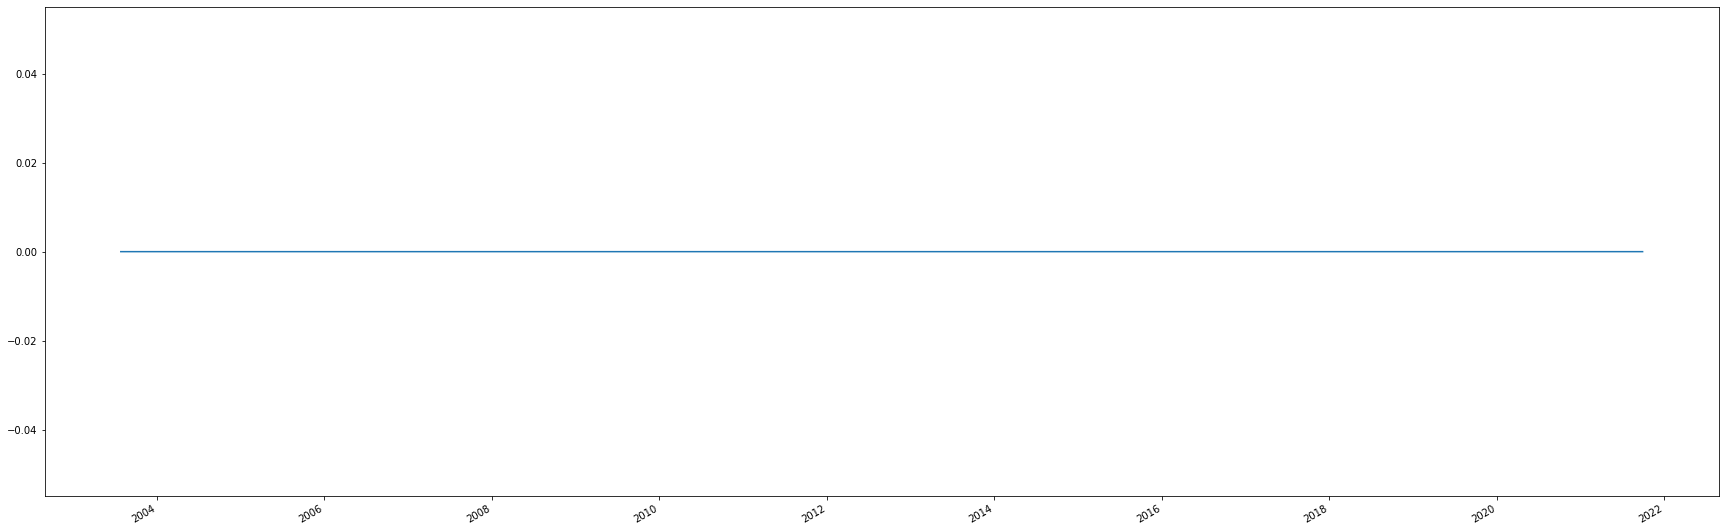

In [183]:
df['Position'].plot(figsize=(30, 10))

In [50]:
benchmark_portfolio

,benchmark_portfolio
2003-07-28,100.000000
2003-07-29,100.000000
2003-07-30,100.000000
2003-07-31,100.000000
2003-08-01,100.000000
...,...
2021-09-22,382.891036
2021-09-23,384.009731
2021-09-24,382.868430
2021-09-27,382.368962


In [144]:
new_gp = pd.DataFrame(
    [['2003-09-29', 0.28000, 0.01800, 0.01800, 0.02700, 0.02700, 0.18000, 0.14400, 0.30600], 
['2004-09-29', 0.30000, 0.01750, 0.01750, 0.02625, 0.02625, 0.17500, 0.14000, 0.29750], 
['2005-09-29', 0.32000, 0.01700, 0.01700, 0.02550, 0.02550, 0.17000, 0.13600, 0.28900], 
['2006-09-29', 0.34000, 0.01650, 0.01650, 0.02475, 0.02475, 0.16500, 0.13200, 0.28050], 
['2007-09-28', 0.36200, 0.01595, 0.01595, 0.02393, 0.02393, 0.15950, 0.12760, 0.27115], 
['2008-09-22', 0.52150, 0.01196, 0.01196, 0.01794, 0.01794, 0.11963, 0.09570, 0.20336], 
['2008-10-13', 0.38400, 0.01540, 0.01540, 0.02310, 0.02310, 0.15400, 0.12320, 0.26180], 
['2008-12-05', 0.53800, 0.01155, 0.01155, 0.01733, 0.01733, 0.11550, 0.09240, 0.19635], 
['2008-12-30', 0.38400, 0.01540, 0.01540, 0.02310, 0.02310, 0.15400, 0.12320, 0.26180], 
['2009-01-29', 0.53800, 0.01155, 0.01155, 0.01733, 0.01733, 0.11550, 0.09240, 0.19635], 
['2009-02-02', 0.38400, 0.01540, 0.01540, 0.02310, 0.02310, 0.15400, 0.12320, 0.26180], 
['2009-02-06', 0.53800, 0.01155, 0.01155, 0.01733, 0.01733, 0.11550, 0.09240, 0.19635], 
['2009-02-09', 0.38400, 0.01540, 0.01540, 0.02310, 0.02310, 0.15400, 0.12320, 0.26180], 
['2009-02-10', 0.53800, 0.01155, 0.01155, 0.01733, 0.01733, 0.11550, 0.09240, 0.19635], 
['2009-02-18', 0.38400, 0.01540, 0.01540, 0.02310, 0.02310, 0.15400, 0.12320, 0.26180], 
['2009-03-10', 0.53800, 0.01155, 0.01155, 0.01733, 0.01733, 0.11550, 0.09240, 0.19635], 
['2009-04-21', 0.38400, 0.01540, 0.01540, 0.02310, 0.02310, 0.15400, 0.12320, 0.26180], 
['2009-09-29', 0.40600, 0.01485, 0.01485, 0.02228, 0.02228, 0.14850, 0.11880, 0.25245], 
['2010-09-29', 0.42800, 0.01430, 0.01430, 0.02145, 0.02145, 0.14300, 0.11440, 0.24310], 
['2011-08-09', 0.57100, 0.01073, 0.01073, 0.01609, 0.01609, 0.10725, 0.08580, 0.18233], 
['2011-09-07', 0.42800, 0.01430, 0.01430, 0.02145, 0.02145, 0.14300, 0.11440, 0.24310], 
['2011-09-29', 0.45000, 0.01375, 0.01375, 0.02063, 0.02063, 0.13750, 0.11000, 0.23375], 
['2012-09-28', 0.47600, 0.01310, 0.01310, 0.01965, 0.01965, 0.13100, 0.10480, 0.22270], 
['2013-09-30', 0.50200, 0.01245, 0.01245, 0.01868, 0.01868, 0.12450, 0.09960, 0.21165], 
['2014-09-29', 0.52800, 0.01180, 0.01180, 0.01770, 0.01770, 0.11800, 0.09440, 0.20060], 
['2015-09-29', 0.55400, 0.01115, 0.01115, 0.01673, 0.01673, 0.11150, 0.08920, 0.18955], 
['2016-09-29', 0.58000, 0.01050, 0.01050, 0.01575, 0.01575, 0.10500, 0.08400, 0.17850], 
['2017-09-29', 0.59800, 0.01005, 0.01005, 0.01508, 0.01508, 0.10050, 0.08040, 0.17085], 
['2018-09-28', 0.61600, 0.00960, 0.00960, 0.01440, 0.01440, 0.09600, 0.07680, 0.16320], 
['2019-09-30', 0.63400, 0.00915, 0.00915, 0.01373, 0.01373, 0.09150, 0.07320, 0.15555], 
['2020-03-12', 0.72550, 0.00686, 0.00686, 0.01029, 0.01029, 0.06863, 0.05490, 0.11666], 
['2020-04-16', 0.63400, 0.00915, 0.00915, 0.01373, 0.01373, 0.09150, 0.07320, 0.15555], 
['2020-09-29', 0.65200, 0.00870, 0.00870, 0.01305, 0.01305, 0.08700, 0.06960, 0.14790], 
['2021-09-28', 0.69000, 0.00775, 0.00775, 0.01163, 0.01163, 0.07750, 0.06200, 0.13175], ],
    columns=['Date', 'AGG',  'EWG', 'EWH', 'EWJ', 'EWQ', 'EWY', 'QQQ', 'SPY']
)
new_gp['Date'] = pd.to_datetime(new_gp['Date'])
new_gp.set_index('Date', inplace=True)

In [145]:
new_gp.index

DatetimeIndex(['2003-09-29', '2004-09-29', '2005-09-29', '2006-09-29',
               '2007-09-28', '2008-09-22', '2008-10-13', '2008-12-05',
               '2008-12-30', '2009-01-29', '2009-02-02', '2009-02-06',
               '2009-02-09', '2009-02-10', '2009-02-18', '2009-03-10',
               '2009-04-21', '2009-09-29', '2010-09-29', '2011-08-09',
               '2011-09-07', '2011-09-29', '2012-09-28', '2013-09-30',
               '2014-09-29', '2015-09-29', '2016-09-29', '2017-09-29',
               '2018-09-28', '2019-09-30', '2020-03-12', '2020-04-16',
               '2020-09-29', '2021-09-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [146]:
strategy = bt.Strategy(
    'new_portfolio', 
    algos=[
        bt.algos.
        bt.algos.SelectAll(), 
        bt.algos.WeighTarget(new_gp), 
        bt.algos.Rebalance(), 
    ]
)
backtest = bt.Backtest(strategy=strategy, data=etf['Adj Close'].loc['2003-09-29':])
result   = bt.run(backtest)

In [147]:
result.prices

,new_portfolio
2003-09-28,100.000000
2003-09-29,100.000000
2003-09-30,99.184941
2003-10-01,101.208692
2003-10-02,101.712087
...,...
2021-09-22,389.630749
2021-09-23,390.768650
2021-09-24,389.607247
2021-09-27,389.099130


In [ ]:
# # def checkRebalanceCondition(a, b):
# #     if a > b:
# #         result = 1
# #     else:
# #         result = 0
# #     return result

# # def checkRebalanceStartDate(a, b):
# #     if (a == 1) & (b == 0):
# #         result = 1
# #     else:
# #         result = 0
# #     return result

# # def checkMaintain(a, b):
# #     if   (a == 1) & (b == 1):
# #         result = -1
# #     elif (a == 1) & (b == 0):
# #         result = 1
# #     else:
# #         result = 0
# #     return result

# def reb(a, b, c, d, e, f):
#     if (a > b + d * c) & (a < b + e * c) & (f > 0):
#         result = 1
#     else:
#         result = 0
#     return result

# def getRebalancedGlidePath(benchmark_portfolio, glide_path, window, under, upper, periods):
#     benchmark_portfolio['HV'] = benchmark_portfolio[benchmark_portfolio.columns[0]].pct_change().rolling(window=20, center=False).std() * np.sqrt(252)
#     benchmark_portfolio['HV_pct'] = benchmark_portfolio['HV'].pct_change(periods=periods)
#     benchmark_portfolio['HV_mean']   = benchmark_portfolio['HV'].mean()
#     benchmark_portfolio['HV_std']    = benchmark_portfolio['HV'].std(ddof=0)
#     benchmark_portfolio['Rebalance'] = benchmark_portfolio.apply(lambda x: reb(x['HV'], x['HV_mean'], x['HV_std'], under, upper, x['HV_pct']), axis=1)
    
#     # 변동성 지표 HV
    
#     # 평균, 표준편차를 계산하기 위한 n
#     # benchmark_portfolio['n'] = 1
#     # HV 값이 nan인 경우 0으로 계산
#     # benchmark_portfolio.loc[benchmark_portfolio['HV'].isna(), 'n'] = 0
#     # 최종 n
#     # benchmark_portfolio['n'] = benchmark_portfolio['n'].cumsum()
    
#     # 첫날부터의 HV의 평균과 표준편차
#     # benchmark_portfolio['HV_mean'] = benchmark_portfolio['HV'].cumsum() / benchmark_portfolio['n']
#     # benchmark_portfolio['HV_std'] = np.sqrt(((benchmark_portfolio['HV'] - benchmark_portfolio['HV_mean']) ** 2) / benchmark_portfolio['n'])
    
#     # 통계적 이상치 : 평균 + under * 표준편차
#     # benchmark_portfolio['HV_threshold_1'] = benchmark_portfolio['HV_mean'] + under * benchmark_portfolio['HV_std']
#     # benchmark_portfolio['HV_threshold_2'] = benchmark_portfolio['HV_mean'] + np.square(under) * benchmark_portfolio['HV_std']
    
    
    
#     # 변동성이 통계적으로 이상치 범위에 속하는지
#     # benchmark_portfolio['Over_HV'] = benchmark_portfolio.apply(lambda x: checkRebalanceCondition(x['HV'], x['HV_threshold']), axis=1)
    
#     # 변동성이 통계적으로 이상치 범위에 속하여서 리밸런싱을 시작해야 하는 지점
#     # benchmark_portfolio['Over_HV_-1'] = benchmark_portfolio['Over_HV'].shift(1)
#     # benchmark_portfolio['StartDate']  = benchmark_portfolio.apply(lambda x: checkRebalanceStartDate(x['Over_HV'], x['Over_HV_-1']), axis=1)
    
#     # 변동성 시작 이후 복구(-1)할지, 유지(1)할지
#     # benchmark_portfolio['Start_-20'] = benchmark_portfolio['StartDate'].shift(window)
#     # benchmark_portfolio['Maintain']  = benchmark_portfolio.apply(lambda x: checkMaintain(x['Start_-20'], x['Over_HV']), axis=1)
    
#     # benchmark_portfolio['Rebalance'] = benchmark_portfolio[['StartDate', 'Maintain']].sum(axis=1)
    
#     # 변동성 시작 이후, 변동성 조건이 유지되는 일자
#     # benchmark_portfolio['Over_HV_count'] = benchmark_portfolio['Over_HV'].rolling(window=window).sum().shift(-20)
#     # benchmark_portfolio['rolling_sum'] = benchmark_portfolio['Over_HV'].rolling(window=20).sum().shift(-20)
    
#     # benchmark_portfolio.drop(['n', ], axis=1, inplace=True)
    
#     return benchmark_portfolio

# getRebalancedGlidePath(benchmark_portfolio, glide_path, window=20, under=2, upper=4, periods=5)[18:30]

# %matplotlib inline
# benchmark_portfolio['temp'] = benchmark_portfolio['benchmark_portfolio'] / 350
# benchmark_portfolio.loc[:,['temp', 'HV', 'Rebalance']].plot(figsize=(40, 15))

In [ ]:
benchmark_portfolio.loc['2007':'2009',['temp', 'HV', 'Rebalance']].plot(figsize=(40, 15))

In [ ]:
benchmark_portfolio.loc['2020':'2021',['temp', 'HV', 'Rebalance']].plot(figsize=(40, 15))

In [ ]:
benchmark_portfolio['StartDate'].sum()

In [ ]:
benchmark_portfolio['HV'].mean() + 4 * benchmark_portfolio['HV'].std(ddof=0)

In [ ]:
benchmark['rb'].plot(figsize=(30, 10))

In [ ]:
benchmark['HV'].plot(figsize=(30, 10))
(list(range(benchmark.shape[0])) * 0.25).plot(figsize=(30, 10))

In [ ]:
benchmark[benchmark['rb'] == 1]

In [ ]:
benchmark['HV'] = benchmark.to_returns().rolling(window=20, center=False).std() * (252 ** 0.5)

In [ ]:
%matplotlib inline
benchmark.loc['2003-09-29':]['HV'].plot(figsize=(27, 9))

In [ ]:
benchmark.loc['2003-09-29':]

In [ ]:
import seaborn as sns

sns.relplot(data=benchmark.loc['2003-09-29':], y='HV', x=benchmark.loc['2003-09-29':].index,
            aspect=4, height=6, kind='line'
            )

In [ ]:
benchmark

In [ ]:
etf_close = etf["Adj Close"]
cols = etf_close.columns
for col in cols:
    etf_close[col+'_HV'] = etf_close[col].pct_change().rolling(window=20, center=False).std() * (252 ** 0.5)

In [ ]:
a = etf_close.iloc[-1:, -8:].T.values.reshape(-1)
b = result.get_weights().iloc[-1:, 1:].T.values.reshape(-1)

In [ ]:
np.sum(etf_close.iloc[:, -8:].dropna(axis=0).values * result.get_weights().iloc[41:, 1:].values, axis=1)

In [ ]:
benchmark['HV2'] = np.nan
benchmark.iloc[-4512:, -1] = np.sum(etf_close.iloc[:, -8:].dropna(axis=0).values * result.get_weights().iloc[41:, 1:].values, axis=1)

In [ ]:
benchmark[['HV', 'HV2']].plot(figsize=(30, 10))

In [ ]:
import seaborn as sns

(benchmark['HV2'] - benchmark['HV']).plot(figsize=(30, 10))

In [ ]:
(benchmark['HV2'] - benchmark['HV']).sum() / 4512

In [ ]:
(benchmark['HV2'] - benchmark['HV']).hist(bins=100, )

In [ ]:
result.get_weights().iloc[41:, 1:].values.shape

In [ ]:
np.sum(a * b)

In [ ]:
asset_a = result.prices
asset_b = result.prices * 231213432

asset_a['Change']    = asset_a['benchmark_portfolio'].pct_change()
asset_a['STDEV']     = asset_a['benchmark_portfolio'].rolling(window=20).std(ddof=0)
asset_a['STDEV_log'] = np.log(asset_a['benchmark_portfolio'].rolling(window=20).std(ddof=0))
asset_a['HV']        = asset_a['Change'].rolling(window=20, center=False).std() * (252 ** 0.5)

asset_b['Change']    = asset_b['benchmark_portfolio'].pct_change()
asset_b['STDEV']     = asset_b['benchmark_portfolio'].rolling(window=20).std(ddof=0)
asset_b['STDEV_log'] = np.log(asset_b['benchmark_portfolio'].rolling(window=20).std(ddof=0))
asset_b['HV']        = asset_b['Change'].rolling(window=20, center=False).std() * (252 ** 0.5)

In [ ]:
asset_a

In [ ]:
asset_b

In [ ]:
%matplotlib inline
asset_a[['STDEV', 'STDEV_log', 'HV']].plot(figsize=(30, 10))

In [ ]:
asset_b[['STDEV', 'STDEV_log', 'HV']].plot(figsize=(30, 10))

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm = MinMaxScaler()
# mm.fit(asset_a[['HV']])
asset_a[['STDEV', 'STDEV_log', 'HV']] = mm.fit_transform(asset_a[['STDEV', 'STDEV_log', 'HV']])
mm = MinMaxScaler()
# mm.fit(asset_b[['HV']])
asset_b[['STDEV', 'STDEV_log', 'HV']] = mm.fit_transform(asset_b[['STDEV', 'STDEV_log', 'HV']])

asset_a[['STDEV', 'STDEV_log', 'HV']].plot(figsize=(30, 10))

In [ ]:
asset_b[['STDEV', 'STDEV_log', 'HV']].plot(figsize=(30, 10))

# backtest result

In [ ]:
result.display()

In [ ]:
result.stats

# total return

In [ ]:
result.prices

# MDD

In [ ]:
result.prices

In [ ]:
import pyfolio as pf

In [ ]:
%matplotlib inline
a = result.prices.to_drawdown_series()
a.plot(figsize=(30, 5))

In [ ]:
result.prices.to_returns().fillna(method='bfill')['benchmark_portfolio']

In [ ]:
b = result.prices.to_returns().fillna(method='bfill')['benchmark_portfolio']

In [ ]:
type(b)

In [ ]:
pf.create_full_tear_sheet(b)

In [ ]:
pf.plot_annual_returns(b)

In [ ]:
pf.plot_daily_volume(b)

In [ ]:
%matplotlib inline
result.plot()

# transactions

In [ ]:
result.get_transactions()

# montly returns

In [ ]:
result.display_monthly_returns()

# daily weights

In [ ]:
result.get_weights()

In [ ]:
result.plot_security_weights()

In [ ]:
result.plot_weights()

In [ ]:
from matplotlib import cm

ax = result.get_security_weights().plot.area(figsize = (10, 6), ylim = [0, 1], legend = False, colormap = cm.jet)
handles, labels = ax.get_legend_handles_labels()
plt.margins(0, 0)
plt.legend(reversed(handles), reversed(labels), loc='lower right')
plt.show()

# daily returns

In [ ]:
result.display_lookback_returns()

In [ ]:
result.prices.to_returns()

In [ ]:
result.prices.to_returns().plot(figsize=(30, 10))

In [ ]:
result.plot_histogram()

In [ ]:
result.plot_histograms()